# Outliner

In [140]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sys
import os


In [142]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from outliener import Outlier
from visualization import plot_univariate

In [143]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

### Data reading

In [144]:
df= pd.read_csv("../data/preprocessed_data.csv")



In [145]:
df.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,65.00,5.00,44.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,1321509685.00,unknown,unknown,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


In [146]:
df = df.drop("Unnamed: 0", axis=1)

In [147]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,65.00,5.00,44.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,1321509685.00,unknown,unknown,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


In [148]:
df.shape

(146887, 47)

## Handiling Outlier

#### Here before getting to data exploration we are going to remove outliers

#### we need to select numeric colums first

In [149]:
Id = ["Bearer Id", 'IMSI', 'MSISDN/Number', 'IMEI']
categorical_columns = ["Last Location Name", "Handset Manufacturer", "Handset Type"]
columns_with_time = ['Start', 'End']


In [150]:
nun_numeric = Id
nun_numeric.extend(categorical_columns)
nun_numeric.extend(columns_with_time)
nun_numeric

['Bearer Id',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Handset Manufacturer',
 'Handset Type',
 'Start',
 'End']

In [151]:
numeric_columns = [col if col not in nun_numeric else ' ' for col in df]
numeric_columns = list(filter(lambda a: a != ' ', numeric_columns))
numeric_columns

['Start ms',
 'End ms',
 'Dur. (ms)',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [152]:
numeric_df = df[numeric_columns].copy()

#### let's use the script we write in the Outlier class to overview the dataframe in terms of outliers 

In [153]:
df_outliers = Outlier(numeric_df)
overview = df_outliers.getOverview()
overview.sort_values(by=['number_of_outliers'], inplace=True)
overview

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
Start ms,250.00,499.00,749.00,499.00,0.00,0,0.0%,0.00,999.00,499.12,-498.50,1497.50
Other UL (Bytes),4144551.00,8265817.00,12382039.50,8237488.50,0.00,0,0.0%,148.00,16558816.00,8262916.61,-8211681.75,24738272.25
Other DL (Bytes),210155459.00,421633232.00,631361047.50,421205588.50,0.00,0,0.0%,3290.00,843442489.00,421004008.43,-421652923.75,1263169430.25
Gaming UL (Bytes),4132622.00,8294516.00,12432390.50,8299768.50,-0.00,0,0.0%,59.00,16558794.00,8290279.88,-8317030.75,24882043.25
Gaming DL (Bytes),210381659.00,423492394.00,633333998.50,422952339.50,-0.00,0,0.0%,2516.00,843441889.00,422062341.16,-424046850.25,1267762507.75
Netflix UL (Bytes),5480202.00,10999348.00,16503222.50,11023020.50,-0.00,0,0.0%,35.00,22011955.00,11002760.66,-11054328.75,33037753.25
Netflix DL (Bytes),5776625.50,11642708.00,17469653.00,11693027.50,-0.00,0,0.0%,42.00,23259189.00,11626468.57,-11762915.75,35009194.25
Youtube UL (Bytes),5516549.00,11013447.00,16514278.00,10997729.00,-0.00,0,0.0%,105.00,22011962.00,11008675.87,-10980044.50,33010871.50
Youtube DL (Bytes),5833462.00,11616334.00,17440635.50,11607173.50,0.00,0,0.0%,53.00,23259098.00,11633306.01,-11577298.25,34851395.75


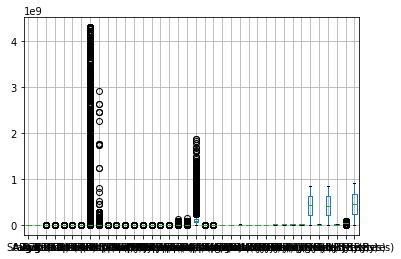

In [154]:
df[numeric_columns].boxplot()

#### from the boxplot above, the black circular points show the presence of lower  and upper inner fence value in the variable

##### so lets replace the columns with fences with IQR

In [155]:
df_outliers.replace_outliers_with_iqr(numeric_columns)

In [156]:
 df_outliers.getOverview()

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
Start ms,250.00,499.00,749.00,499.00,0.00,0,0.0%,0.00,999.00,499.12,-498.50,1497.50
End ms,251.00,500.00,750.00,499.00,-0.00,0,0.0%,0.00,999.00,498.66,-497.50,1498.50
Dur. (ms),58526.50,86399.00,133159.00,74632.50,0.81,0,0.0%,7142.00,245107.75,100188.83,-53422.25,245107.75
Avg RTT DL (ms),31.00,44.00,67.00,36.00,1.07,0,0.0%,0.00,121.00,54.04,-23.00,121.00
Avg RTT UL (ms),2.00,5.00,13.00,11.00,1.17,0,0.0%,0.00,29.50,9.29,-14.50,29.50
Avg Bearer TP DL (kbps),43.00,64.00,20024.00,19981.00,1.28,0,0.0%,0.00,49995.50,11273.63,-29928.50,49995.50
Avg Bearer TP UL (kbps),47.00,63.00,1136.00,1089.00,1.23,0,0.0%,0.00,2769.50,716.09,-1586.50,2769.50
TCP DL Retrans. Vol (Bytes),24895.00,391635.00,3078146.00,3053251.00,1.22,0,0.0%,2.00,7658022.50,2005269.08,-4554981.50,7658022.50
TCP UL Retrans. Vol (Bytes),3299.50,16436.00,68622.00,65322.50,1.20,0,0.0%,1.00,166605.75,46534.73,-94684.25,166605.75


In [157]:
clean_df = df_outliers.df

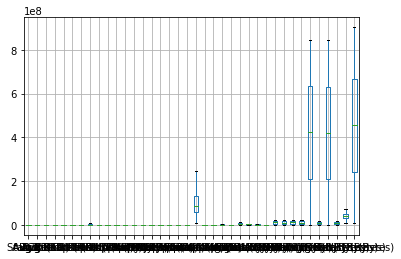

In [158]:
clean_df[numeric_columns].boxplot()

In [159]:
clean_df.head(20)

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,770.00,662.00,245107.75,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,245108160.50,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,235.00,606.00,245107.75,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,245108160.50,971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,1.00,652.00,245107.75,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,245108160.50,751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,486.00,171.00,245107.75,65.00,5.00,44.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,245108160.50,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,565.00,954.00,245107.75,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,245108160.50,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00
5,439.00,553.00,245107.75,65.00,5.00,70.00,54.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,22639.00,22700.00,245108160.50,112.00,118.00,3148833.00,51181.00,10351530.00,2582603.00,1980032.00,922378.00,21332918.00,2611113.00,7345361.00,6536448.00,710293538.00,13167974.00,654978277.00,4436057.00,30307754.00,754452212.00
6,612.00,168.00,245107.75,102.00,5.00,22.00,38.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,9785.00,316210.00,245108160.50,33.00,655.00,1623509.00,1482.00,1837897.00,3068975.00,1838947.00,252032.00,7234465.00,1886295.00,13231006.00,17981760.00,44796223.00,14084934.00,803653557.00,10649768.00,47925246.00,70562047.00
7,592.00,512.00,245107.75,39.00,18.00,3698.00,416.00,19520.00,7230.00,99.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,70832.00,74477.00,245108160.50,708.00,666.00,3103940.00,57463.00,1304524.00,2568189.00,2987408.00,512696.00,12189786.00,19735183.00,6858496.00,12075206.00,748906189.00,16149622.00,537601820.00,7714657.00,58813016.00,775350343.00
8,121.00,960.00,245107.75,39.00,18.00,46.00,49.00,3231397.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,162472.00,176488.00,245108160.50,794.00,826.00,342043.00,30582.00,7560820.00,1341279.00,3014208.00,365861.00,18436641.00,10860867.00,10587264.00,8467177.00,821671285.00,6548349.00,172920486.00,14749031.00,42363146.00,861612261.00
9,0.00,284.00,245107.75,97.00,7.00,3845.00,2535.00,3231397.00,7230.00,77.50,10.00,2.00,0.00,99.00,0.00,0.00,0.00,1537874.00,1496398.00,245108160.50,4421.00,6005.75,1541259.00,44154.00,8601949.00

In [160]:
clean_df.to_csv('../data/clean_data.csv')

# User Overview

In [161]:
from overview import OverView

In [162]:
clean_df.head()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,770.00,662.00,245107.75,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,245108160.50,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,235.00,606.00,245107.75,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,245108160.50,971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,1.00,652.00,245107.75,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,245108160.50,751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,486.00,171.00,245107.75,65.00,5.00,44.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,245108160.50,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,565.00,954.00,245107.75,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,245108160.50,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


## Univariate Analysis

## Top 10 handsets used by the customers

In [163]:
hand_type_df = OverView.filter_by_count(df,"Handset Type").head(10)

hand_type_df

,Handset Type,count
0,Huawei B528S-23A,19373
1,Apple iPhone 6S (A1688),9369
2,Apple iPhone 6 (A1586),8967
3,unknown,8820
4,Apple iPhone 7 (A1778),6240
5,Apple iPhone Se (A1723),5150
6,Apple iPhone 8 (A1905),4961
7,Apple iPhone Xr (A2105),4542
8,Samsung Galaxy S8 (Sm-G950F),4404
9,Apple iPhone X (A1901),3788


In [164]:
    fig = px.pie(hand_type_df, values='count', names="Handset Type", title=f'Distribution of {"Handset Type"}s', width=800, height=500)
    fig.show()

## Top 3 handset Manufacturers

In [165]:
top_manufacturers = OverView.filter_by_count(df, 'Handset Manufacturer').head(3)
top_manufacturers

,Handset Manufacturer,count
0,Apple,59069
1,Samsung,39902
2,Huawei,33754


In [166]:
fig = px.pie(top_manufacturers, values='count', names="Handset Manufacturer", title=f'Distribution of {"Handset Manufacturer"}s', width=800, height=500)
fig.show()

## Top 5 handsets per Top 3 handset manufacturer

In [167]:
top3_manufacturers = top_manufacturers['Handset Manufacturer'].values
top_manufacturers = df[df["Handset Manufacturer"].isin(top3_manufacturers)]
top= top_manufacturers['Handset Type'].groupby(
    df['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9369
                      Apple iPhone 6 (A1586)             8967
                      Apple iPhone 7 (A1778)             6240
                      Apple iPhone Se (A1723)            5150
                      Apple iPhone 8 (A1905)             4961
Huawei                Huawei B528S-23A                  19373
                      Huawei E5180                       2062
                      Huawei P20 Lite Huawei Nova 3E     2000
                      Huawei P20                         1471
                      Huawei Y6 2018                      984
Samsung               Samsung Galaxy S8 (Sm-G950F)       4404
                      Samsung Galaxy A5 Sm-A520F         3673
                      Samsung Galaxy J5 (Sm-J530)        3664
                      Samsung Galaxy J3 (Sm-J330)        3431
                      Samsung Galaxy S7 (Sm-G930X)       3106
Name: Handset Typ

## Task 1.1 Aggregate per user for 


### Number of xDR sessions

In [168]:
sessions = OverView.find_agg(df, 'IMSI', 'count', 'Bearer Id', 10, False)
sessions

,IMSI,Bearer Id
36236,208201402778052.00,18
70833,208201715944176.00,17
15641,208201007176097.00,17
86933,208201906760163.00,16
99614,208202100881019.00,15
24872,208201009693091.00,15
10374,208200853859127.00,13
88411,208201907543212.00,12
2913,208200313716101.00,12
83414,208201771999179.00,12


### Average session duration per user

In [169]:
session_duration_per_user = df.groupby('IMSI').agg({'Dur. (ms)': 'mean'})
session_duration_per_user.rename(
        columns={'Dur. (ms)': 'Average session duration (ms)'}, inplace=True)
session_duration_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
IMSI,
208201008876063.00,1573420.00
208201716813158.00,1480875.00
208201909080025.00,1474663.00
208201008867170.00,1375612.00
208200314458056.00,1361762.00
208209501611082.00,1357643.00
208201402342131.00,1321509.00
208209501604032.00,1299381.00
208201716761343.00,1209607.00


## Total data download and upload 

In [170]:
usage = df.groupby('IMSI')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()
usage['Total Data'] = usage['Total DL (Bytes)'] + usage['Total UL (Bytes)']
usage.nlargest(10, 'Total Data').head(10)


,Total UL (Bytes),Total DL (Bytes),Total Data
IMSI,,,
208201715944176.00,689483001.00,8156743493.00,8846226494.00
208202100881019.00,703478581.00,7811295382.00,8514773963.00
208201007176097.00,729577380.00,7770043342.00,8499620722.00
208201402778052.00,669650721.00,7301516540.00,7971167261.00
208201009693091.00,581568792.00,7309541816.00,7891110608.00
208201906760163.00,624260321.00,7081602462.00,7705862783.00
208201402604136.00,405060976.00,6903439962.00,7308500938.00
208200313716101.00,521518890.00,6610851624.00,7132370514.00
208201714300272.00,471244453.00,6400773755.00,6872018208.00


### from the above we can coclude
##### 1.mostly user prefer downloading rather than uploading and

### Aggrications for User applications

In [171]:
# Aggregating per user the total data
aggregate_user_group = usage.groupby(['IMSI'])
aggregate_user_group['Total Data'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
IMSI,,,,,
208200101016140.00,85171639.00,85171639.00,85171639.00,85171639.00,85171639.00
208200101127285.00,426501585.00,426501585.00,426501585.00,426501585.00,426501585.00
208200101148045.00,1033092027.00,1033092027.00,1033092027.00,1033092027.00,1033092027.00
208200101148074.00,704805670.00,704805670.00,704805670.00,704805670.00,704805670.00
208200101148075.00,957213511.00,957213511.00,957213511.00,957213511.00,957213511.00
208200101148136.00,1001699033.00,1001699033.00,1001699033.00,1001699033.00,1001699033.00
208200101148139.00,451864338.00,451864338.00,451864338.00,451864338.00,451864338.00
208200101148152.00,367127426.00,367127426.00,367127426.00,367127426.00,367127426.00
208200101149058.00,356843906.00,356843906.00,356843906.00,356843906.00,356843906.00


## The total data volume (in Bytes) for each application

#### In the dataset we have separate total  DL and UL for each application , so let sum them up to get a good insight

In [172]:
df['Social Media Data Volume (Bytes)'] = df['Social Media UL (Bytes)'] + df['Social Media DL (Bytes)']
df['Google Data Volume (Bytes)'] = df['Google UL (Bytes)'] + df['Google DL (Bytes)']
df['Email Data Volume (Bytes)'] = df['Email UL (Bytes)'] + df['Email DL (Bytes)']
df['Youtube Data Volume (Bytes)'] = df['Youtube UL (Bytes)'] + df['Youtube DL (Bytes)']
df['Netflix Data Volume (Bytes)'] = df['Netflix UL (Bytes)'] + df['Netflix DL (Bytes)']
df['Gaming Data Volume (Bytes)'] = df['Gaming UL (Bytes)'] + df['Gaming DL (Bytes)']
df['Other Data Volume (Bytes)'] = df['Other UL (Bytes)'] + df['Other DL (Bytes)']
df['Total Data Volume (Bytes)'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

### let's groupby them by IMSI b/c Imsi is a uniqe And get the total volume (in bytes) during this session for each application

In [173]:
apps_total = df.groupby('IMSI')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
apps_total.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
IMSI,,,,,,,,
208201715944176.00,28294544.00,127973787.00,40788634.00,394370218.00,361401046.00,7749432234.00,7639263572.00,8846226494.00
208202100881019.00,39783189.00,123223099.00,33693767.00,396289198.00,334643269.00,7461045228.00,4716134493.00,8514773963.00
208201007176097.00,27135500.00,142307915.00,40633966.00,452958769.00,356980607.00,7326673487.00,6354583086.00,8499620722.00
208201402778052.00,43374779.00,152191852.00,42418782.00,374483047.00,328725740.00,6887572116.00,8167877776.00,7971167261.00
208201009693091.00,19222921.00,109860502.00,31514421.00,317410572.00,309093159.00,6970567597.00,6798515150.00,7891110608.00
208201906760163.00,35412358.00,116516345.00,35999792.00,257991088.00,399519079.00,6725559211.00,6317415487.00,7705862783.00
208201402604136.00,18629986.00,89320737.00,25557139.00,227336012.00,214416926.00,6646303338.00,4349141478.00,7308500938.00
208200313716101.00,20777205.00,82738720.00,25576965.00,303169107.00,318347546.00,6268619592.00,4101645436.00,7132370514.00
208201714300272.00,19390599.00,90389372.00,21426007.00,276834013.00,251798809.00,6103856008.00,3976960308.00,6872018208.00


In [174]:
# Aggregating per user the Social Media Data Volume column
aggregate_user_group = df.groupby(['IMSI'])
aggregate_user_group['Social Media Data Volume (Bytes)'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
IMSI,,,,,
208200101016140.00,3122781.00,3122781.00,3122781.00,3122781.00,3122781.00
208200101127285.00,2577104.00,2577104.00,2577104.00,2577104.00,2577104.00
208200101148045.00,1672998.00,1753718.00,1713358.00,1713358.00,3426716.00
208200101148074.00,1051833.00,1051833.00,1051833.00,1051833.00,1051833.00
208200101148075.00,780034.00,3007389.00,1893711.50,1893711.50,3787423.00
208200101148136.00,1732908.00,3459802.00,2596355.00,2596355.00,5192710.00
208200101148139.00,1266474.00,1266474.00,1266474.00,1266474.00,1266474.00
208200101148152.00,2223777.00,2223777.00,2223777.00,2223777.00,2223777.00
208200101149058.00,721647.00,721647.00,721647.00,721647.00,721647.00


In [175]:
# Aggregating per user the Google Data Volume column
aggregate_user_group = df.groupby(['IMSI'])
aggregate_user_group['Google Data Volume (Bytes)'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
IMSI,,,,,
208200101016140.00,1624662.00,1624662.00,1624662.00,1624662.00,1624662.00
208200101127285.00,13811478.00,13811478.00,13811478.00,13811478.00,13811478.00
208200101148045.00,3095120.00,8570767.00,5832943.50,5832943.50,11665887.00
208200101148074.00,13275341.00,13275341.00,13275341.00,13275341.00,13275341.00
208200101148075.00,8654117.00,11095486.00,9874801.50,9874801.50,19749603.00
208200101148136.00,2482669.00,11581755.00,7032212.00,7032212.00,14064424.00
208200101148139.00,5665229.00,5665229.00,5665229.00,5665229.00,5665229.00
208200101148152.00,9075463.00,9075463.00,9075463.00,9075463.00,9075463.00
208200101149058.00,7327558.00,7327558.00,7327558.00,7327558.00,7327558.00


In [176]:
# Aggregating per user the Email Data Volume column
aggregate_user_group = df.groupby(['IMSI'])
aggregate_user_group['Email Data Volume (Bytes)'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
IMSI,,,,,
208200101016140.00,3657501.00,3657501.00,3657501.00,3657501.00,3657501.00
208200101127285.00,3855734.00,3855734.00,3855734.00,3855734.00,3855734.00
208200101148045.00,2165511.00,3398951.00,2782231.00,2782231.00,5564462.00
208200101148074.00,3438893.00,3438893.00,3438893.00,3438893.00,3438893.00
208200101148075.00,2125685.00,2202101.00,2163893.00,2163893.00,4327786.00
208200101148136.00,1377333.00,4164092.00,2770712.50,2770712.50,5541425.00
208200101148139.00,503950.00,503950.00,503950.00,503950.00,503950.00
208200101148152.00,1645862.00,1645862.00,1645862.00,1645862.00,1645862.00
208200101149058.00,2652465.00,2652465.00,2652465.00,2652465.00,2652465.00


In [177]:
# Aggregating per user the Youtube Data Volume column
aggregate_user_group = df.groupby(['IMSI'])
aggregate_user_group['Youtube Data Volume (Bytes)'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
IMSI,,,,,
208200101016140.00,19882439.00,19882439.00,19882439.00,19882439.00,19882439.00
208200101127285.00,25657632.00,25657632.00,25657632.00,25657632.00,25657632.00
208200101148045.00,5020878.00,8819323.00,6920100.50,6920100.50,13840201.00
208200101148074.00,19596808.00,19596808.00,19596808.00,19596808.00,19596808.00
208200101148075.00,23932289.00,26974954.00,25453621.50,25453621.50,50907243.00
208200101148136.00,2439451.00,9384010.00,5911730.50,5911730.50,11823461.00
208200101148139.00,16310061.00,16310061.00,16310061.00,16310061.00,16310061.00
208200101148152.00,35885492.00,35885492.00,35885492.00,35885492.00,35885492.00
208200101149058.00,29056814.00,29056814.00,29056814.00,29056814.00,29056814.00


In [178]:
# Aggregating per user the Netflix Data Volume column
aggregate_user_group = df.groupby(['IMSI'])
aggregate_user_group['Netflix Data Volume (Bytes)'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
IMSI,,,,,
208200101016140.00,31830562.00,31830562.00,31830562.00,31830562.00,31830562.00
208200101127285.00,27785852.00,27785852.00,27785852.00,27785852.00,27785852.00
208200101148045.00,28551852.00,28791563.00,28671707.50,28671707.50,57343415.00
208200101148074.00,34177184.00,34177184.00,34177184.00,34177184.00,34177184.00
208200101148075.00,6770978.00,23111159.00,14941068.50,14941068.50,29882137.00
208200101148136.00,4221083.00,12826463.00,8523773.00,8523773.00,17047546.00
208200101148139.00,25274811.00,25274811.00,25274811.00,25274811.00,25274811.00
208200101148152.00,25595503.00,25595503.00,25595503.00,25595503.00,25595503.00
208200101149058.00,28303472.00,28303472.00,28303472.00,28303472.00,28303472.00


In [179]:
# Aggregating per user the Gaming Data Volume  column
aggregate_user_group = df.groupby(['IMSI'])
aggregate_user_group['Gaming Data Volume (Bytes)'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
IMSI,,,,,
208200101016140.00,9124516.00,9124516.00,9124516.00,9124516.00,9124516.00
208200101127285.00,344105897.00,344105897.00,344105897.00,344105897.00,344105897.00
208200101148045.00,250094128.00,667590638.00,458842383.00,458842383.00,917684766.00
208200101148074.00,632745679.00,632745679.00,632745679.00,632745679.00,632745679.00
208200101148075.00,316726122.00,518492776.00,417609449.00,417609449.00,835218898.00
208200101148136.00,282530750.00,657067982.00,469799366.00,469799366.00,939598732.00
208200101148139.00,400273809.00,400273809.00,400273809.00,400273809.00,400273809.00
208200101148152.00,290007171.00,290007171.00,290007171.00,290007171.00,290007171.00
208200101149058.00,280582583.00,280582583.00,280582583.00,280582583.00,280582583.00


In [180]:
# Aggregating per user the Other Data Volume  column
aggregate_user_group = df.groupby(['IMSI'])
aggregate_user_group['Other Data Volume (Bytes)'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
IMSI,,,,,
208200101016140.00,515973704.00,515973704.00,515973704.00,515973704.00,515973704.00
208200101127285.00,309610741.00,309610741.00,309610741.00,309610741.00,309610741.00
208200101148045.00,352804284.00,726631135.00,539717709.50,539717709.50,1079435419.00
208200101148074.00,549222257.00,549222257.00,549222257.00,549222257.00,549222257.00
208200101148075.00,121037506.00,358740754.00,239889130.00,239889130.00,479778260.00
208200101148136.00,434025929.00,635403557.00,534714743.00,534714743.00,1069429486.00
208200101148139.00,799065942.00,799065942.00,799065942.00,799065942.00,799065942.00
208200101148152.00,354263472.00,354263472.00,354263472.00,354263472.00,354263472.00
208200101149058.00,309296545.00,309296545.00,309296545.00,309296545.00,309296545.00



# Task 1.2

### Non-Graphical  Analysis the basic metrics like mean media , std and etc 

##### Non- graphical analysis for session duration

###### Condacting a non-Graphical Univariate Analysis by computing dispersion paramenters for each quantitative variable and provide useful interpretations

#### let select the relevant one's for which we can us for analysis

In [191]:
columns =["IMSI","Dur. (ms)","Bearer Id","Handset Manufacturer","Social Media Data Volume (Bytes)",
           "Google Data Volume (Bytes)","Email Data Volume (Bytes)",
           "Youtube Data Volume (Bytes)","Netflix Data Volume (Bytes)","Gaming Data Volume (Bytes)",
          "Other Data Volume (Bytes)","Total Data Volume (Bytes)"]

In [192]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146887 entries, 0 to 146886
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   IMSI                              146887 non-null  float64
 1   Dur. (ms)                         146887 non-null  float64
 2   Bearer Id                         146887 non-null  float64
 3   Handset Manufacturer              146887 non-null  object 
 4   Social Media Data Volume (Bytes)  146887 non-null  float64
 5   Google Data Volume (Bytes)        146887 non-null  float64
 6   Email Data Volume (Bytes)         146887 non-null  float64
 7   Youtube Data Volume (Bytes)       146887 non-null  float64
 8   Netflix Data Volume (Bytes)       146887 non-null  float64
 9   Gaming Data Volume (Bytes)        146887 non-null  float64
 10  Other Data Volume (Bytes)         146887 non-null  float64
 11  Total Data Volume (Bytes)         146887 non-null  f

In [193]:
relevateData= df[columns]

In [194]:
aggregate_user_group.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00,1570185.00,2905912.00,3701304.00,18355943.00,17855187.00,292426453.00,180558843.00,345629377.00
1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00,1933278.00,4414096.00,937385.00,39359124.00,35565545.00,609920783.00,541959383.00,707185356.00
2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00,1726277.00,10229119.00,3363124.00,34425237.00,23751202.00,229980251.00,414908351.00,307690973.00
3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,65.00,5.00,44.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,1321509685.00,unknown,unknown,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00,657493.00,11811761.00,2070983.00,36534765.00,15092588.00,810387875.00,761837216.00,889352748.00
4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00,912788.00,7748843.00,2110349.00,34222253.00,17539799.00,53123

In [195]:
session_duration = aggregate_user_group['Dur. (ms)'].agg(['min','max', 'mean']).head(10)
session_duration

,min,max,mean
IMSI,,,
208200101016140.00,86019.00,86019.00,86019.00
208200101127285.00,86254.00,86254.00,86254.00
208200101148045.00,183286.00,390637.00,286961.50
208200101148074.00,13835.00,13835.00,13835.00
208200101148075.00,129214.00,243240.00,186227.00
208200101148136.00,116024.00,116034.00,116029.00
208200101148139.00,86399.00,86399.00,86399.00
208200101148152.00,136356.00,136356.00,136356.00
208200101149058.00,127067.00,127067.00,127067.00


In [196]:
relevateData.head(5)

,IMSI,Dur. (ms),Bearer Id,Handset Manufacturer,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,208201448079117.00,1823652.00,13114483460844900352.00,Samsung,1570185.00,2905912.00,3701304.00,18355943.00,17855187.00,292426453.00,180558843.00,345629377.00
1,208201909211140.00,1365104.00,13114483482878900224.00,Samsung,1933278.00,4414096.00,937385.00,39359124.00,35565545.00,609920783.00,541959383.00,707185356.00
2,208200314458056.00,1361762.00,13114483484080500736.00,Samsung,1726277.00,10229119.00,3363124.00,34425237.00,23751202.00,229980251.00,414908351.00,307690973.00
3,208201402342131.00,1321509.00,13114483485442799616.00,unknown,657493.00,11811761.00,2070983.00,36534765.00,15092588.00,810387875.00,761837216.00,889352748.00
4,208201401415120.00,1089009.00,13114483499480700928.00,Samsung,912788.00,7748843.00,2110349.00,34222253.00,17539799.00,531237049.00,564619822.00,607681403.00


##### Conduct graphical univariate analysis by identifying the most suitable plotting data from each variable and interprate your finding

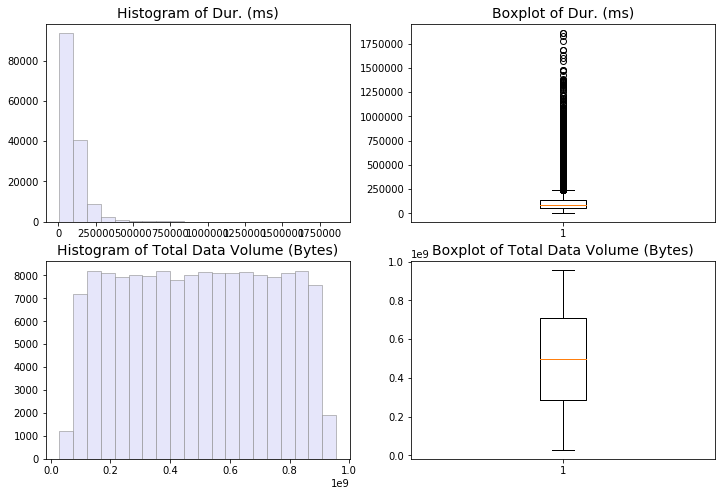

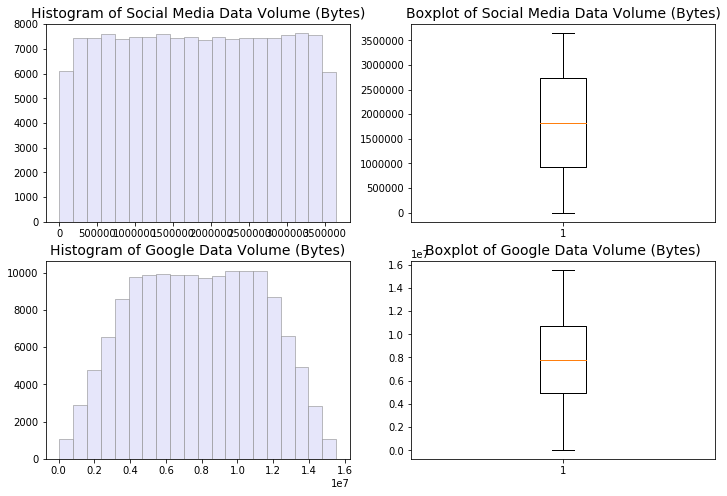

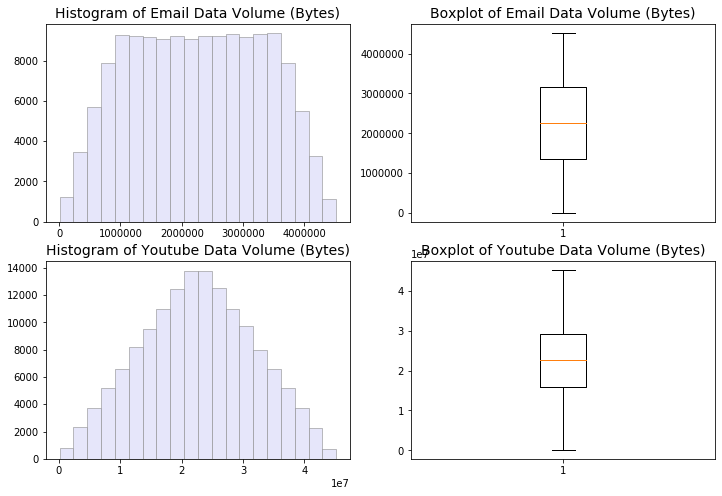

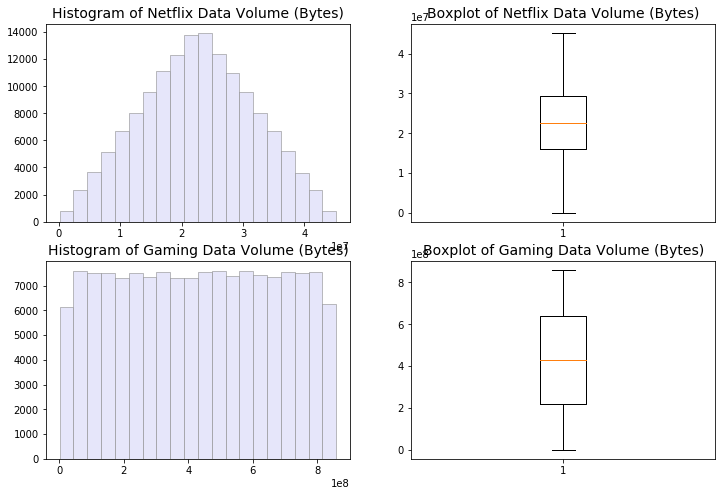

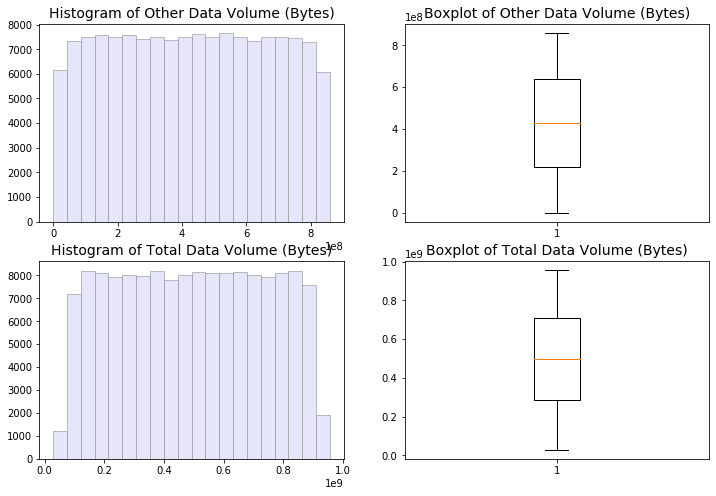

In [200]:
plot_univariate(relevateData, 'Dur. (ms)','Total Data Volume (Bytes)')
plot_univariate(relevateData, 'Social Media Data Volume (Bytes)','Google Data Volume (Bytes)')
plot_univariate(relevateData, 'Email Data Volume (Bytes)','Youtube Data Volume (Bytes)')
plot_univariate(relevateData, 'Netflix Data Volume (Bytes)','Gaming Data Volume (Bytes)')
plot_univariate(relevateData, 'Other Data Volume (Bytes)','Total Data Volume (Bytes)')

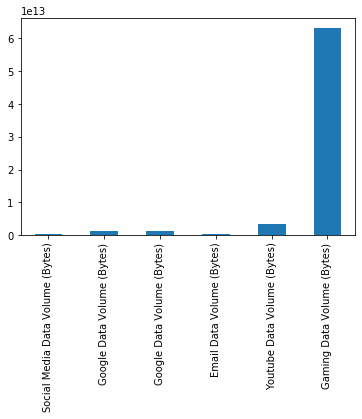

In [90]:
relevateData[['Social Media Data Volume (Bytes)','Google Data Volume (Bytes)','Email Data Volume (Bytes)','Youtube Data Volume (Bytes)','Gaming Data Volume (Bytes)']].sum().plot(kind='bar')

## As we can see from the above graph we can see that user spend on gaming

##### The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles..

In [ ]:
df[cols].describe()

In [ ]:
# scaler = StandardScaler()
# scaled_array = scaler.fit_transform(df[cols])

In [ ]:
# scaled_data = pd.DataFrame(scaled_array, columns=cols)
# scaled_data.head()

In [ ]:
scaled_data.describe()

## Graphical Univariate Analysis

## Bivariate Analysis

### 1) Exploring the relationship between each  application mentod and interpret your findings

In [ ]:
sample_data = scaled_data.sample(1500)

## Social Media Data Volume (bytes) vs Total Data volume(bytes)

In [ ]:
sns.scatterplot(data =sample_data, x="Social Media Data Volume (Bytes)", y ="Total Data Volume (Bytes)")

## Google Data Data Volume (bytes) vs Total Data volume(bytes)

In [ ]:
sns.scatterplot(data=df.sample(1500), x= "Google Data Volume (Bytes)", y ="Total Data Volume (Bytes)")

## Email Data Volume (Bytes) and Total Data Volume (Bytes)

In [ ]:
sns.scatterplot(data=df.sample(1500), x= "Email Data Volume (Bytes)", y ="Total Data Volume (Bytes)")

## Youtube Data Volume (Bytes) and Total Data Volume (Bytes)

In [ ]:
sns.scatterplot(data=df.sample(1500), x= "Youtube Data Volume (Bytes)", y ="Total Data Volume (Bytes)")
# px.bar(df.sample(1500),  'Youtube Data Volume (Bytes)',  ['Total Data Volume (Bytes)'], rot = 40)
# px.bar

## Netflix Data Volume (Bytes) and Total Data Volume (Bytes)

In [ ]:
sns.scatterplot(data=df.sample(1500), x= "Netflix Data Volume (Bytes)", y ="Total Data Volume (Bytes)")

## Gaming Data Volume (Bytes) and Total Data Volume (Bytes)

In [ ]:
sns.scatterplot(data=df.sample(1500), x= "Gaming Data Volume (Bytes)", y ="Total Data Volume (Bytes)")

## Gaming Data Volume (Bytes) and Total Data Volume (Bytes)

In [ ]:
sns.scatterplot(data=df.sample(1500), x= "Other Data Volume (Bytes)", y ="Total Data Volume (Bytes)")

#### Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.


In [ ]:
df.head()

In [ ]:
user_dur = df.groupby(
    'IMSI').agg({'Dur. (ms)': 'sum', 'Total Data Volume (Bytes)': 'sum'})
user_dur

## Segment the users into top five decile classes based on the total duration for all sessions

In [ ]:
relevateData['Decile'] = pd.qcut(relevateData['Dur. (ms)'],11,duplicates='drop')
ax=relevateData.groupby('Decile')['Total Data Volume (Bytes)'].sum().sort_values(ascending=False).tail(5).plot(kind='bar',xticks=[0,1,2,3,4])
ax.set_xticklabels(['First','Second','Third','Fourth','Fifth'])
ax.set_ylabel('Data Transfers')

#  Interprating correlation Analysis